In [88]:
import pandas as pd

In [89]:
df = pd.read_csv('E:\\Data Science learning\\Data set\\House Price Prediction\\train.csv')

In [90]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,142125


In [91]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,755000.000000


In [92]:
df3 = df[['Id','SalePrice']]
df3

,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000
...,...,...
1455,1456,175000
1456,1457,210000
1457,1458,266500
1458,1459,142125


In [93]:
FEATURES=['Id','SalePrice']
copy = df[FEATURES].copy()

In [94]:
copy

,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000
...,...,...
1455,1456,175000
1456,1457,210000
1457,1458,266500
1458,1459,142125


In [95]:
df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
Utilities         0
SalePrice         0
dtype: int64

In [96]:
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [97]:
import numpy as np
num_missing = df['Alley'].isnull().sum()
# Calculate the number of "Grvl" and "Pave" values to impute based on the specified percentages
num_grvl_to_impute = int(num_missing * 0.65)
num_pave_to_impute = int(num_missing * 0.35)
# Get the indices of rows with missing 'Alley' values
missing_indices = df[df['Alley'].isnull()].index
# Randomly impute "Grvl" and "Pave" for the missing values
grvl_indices = np.random.choice(missing_indices, size=num_grvl_to_impute, replace=False)
pave_indices = np.setdiff1d(missing_indices, grvl_indices)
df.loc[grvl_indices, 'Alley'] = "Grvl"
df.loc[pave_indices, 'Alley'] = "Pave"
# Check if the missing values are handled
print(df['Alley'].isnull().sum())

0


In [98]:
df['Alley'].unique()

array(['Grvl', 'Pave'], dtype=object)

In [99]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
SalePrice        0
dtype: int64

In [100]:
df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [101]:
df['LotFrontage'].mode()

0    60.0
dtype: float64

In [102]:
df['LotFrontage'].median()

69.0

In [103]:
df['LotFrontage'].mean()

70.04995836802665

In [104]:
df['LotFrontage'].fillna(0, inplace=True)

In [105]:
df.isnull().sum()

Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
Alley          0
LotShape       0
LandContour    0
Utilities      0
SalePrice      0
dtype: int64

In [106]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,755000.000000


In [111]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,175000
1456,1457,20,RL,85.0,13175,Pave,Pave,Reg,Lvl,AllPub,210000
1457,1458,70,RL,66.0,9042,Pave,Pave,Reg,Lvl,AllPub,266500
1458,1459,20,RL,68.0,9717,Pave,Pave,Reg,Lvl,AllPub,142125


In [115]:
from sklearn.preprocessing import LabelEncoder

In [116]:
label_encoder = LabelEncoder()
column1 = ['Street','Alley','LotShape','LandContour','Utilities','MSZoning']
for col in column1:
    df[col] = label_encoder.fit_transform(df[col])

In [117]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,208500
1,2,20,3,80.0,9600,1,0,3,3,0,181500
2,3,60,3,68.0,11250,1,0,0,3,0,223500
3,4,70,3,60.0,9550,1,0,0,3,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,0,3,3,0,175000
1456,1457,20,3,85.0,13175,1,1,3,3,0,210000
1457,1458,70,3,66.0,9042,1,1,3,3,0,266500
1458,1459,20,3,68.0,9717,1,1,3,3,0,142125


# visualizasion

In [118]:
import matplotlib.pyplot as plt
import numpy as np

In [119]:
correlation_matrix = df.corr()

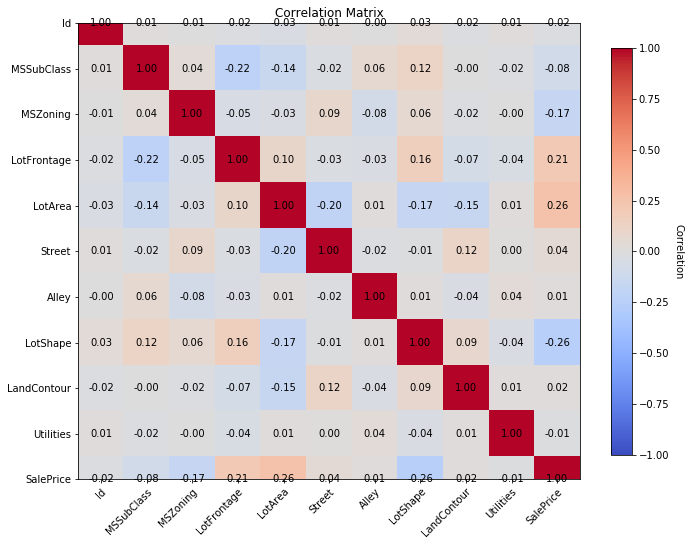

In [120]:
def plot_correlation_matrix(correlation_matrix):
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create a heatmap
    im = ax.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

    # Show colorbar to represent the correlation values
    cbar = ax.figure.colorbar(im, ax=ax, shrink=0.8)
    cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")

    # Set the labels for x and y axes
    ax.set_xticks(np.arange(len(correlation_matrix.columns)))
    ax.set_yticks(np.arange(len(correlation_matrix.index)))
    ax.set_xticklabels(correlation_matrix.columns)
    ax.set_yticklabels(correlation_matrix.index)

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations for each cell
    for i in range(len(correlation_matrix.index)):
        for j in range(len(correlation_matrix.columns)):
            ax.text(j, i, "{:.2f}".format(correlation_matrix.iloc[i, j]),
                    ha="center", va="center", color="black")

    # Add a title and show the plot
    ax.set_title("Correlation Matrix")
    plt.tight_layout()
    plt.show()

# Call the function to plot the correlation matrix
plot_correlation_matrix(correlation_matrix)


# Traning Model

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [131]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']


In [132]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities
0,1,60,3,65.0,8450,1,0,3,3,0
1,2,20,3,80.0,9600,1,0,3,3,0
2,3,60,3,68.0,11250,1,0,0,3,0
3,4,70,3,60.0,9550,1,0,0,3,0
4,5,60,3,84.0,14260,1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,0,3,3,0
1456,1457,20,3,85.0,13175,1,1,3,3,0
1457,1458,70,3,66.0,9042,1,1,3,3,0
1458,1459,20,3,68.0,9717,1,1,3,3,0


In [133]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [134]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 6101110140.584807
R-squared: 0.2045827027710968


# training with Random Forest Regressor:

In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Model Performance:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Random Forest Regression Model Performance:
Mean Squared Error: 4974447154.374562
R-squared: 0.3514686311889206


# Traning model with XGB

In [140]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the XGBoost Regression model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)  # You can adjust hyperparameters
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Regression Model Performance:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


XGBoost Regression Model Performance:
Mean Squared Error: 3829005410.2961135
R-squared: 0.5008027941877726


In [146]:
!pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/55/d1/a3631a36859ee324e1767fa7554fdf7af17965571d8537b20b311b76bcfe/tensorflow-2.11.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/f7/8c/18288ac12dc0e1997c73f1b86dbd6f7fa3674ae5341769387e1f13b07c9e/tensorflow_intel-2.11.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/b6/48/583c032b79ae5b3daa02225a675aeb673e58d2cb698e78510feceb11958c/gast-0.4.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a3/de/c648ef6835192e6e2cc03f40b19eeda4382c49b5bafb43d88b931c4c74ac/google_pasta-0.2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3f/b1/1702140b92543318ecca7ed502fcb18085a9d5760058cf9ea2310bb8dbd6/tensorflow_io_gcs_filesystem-0.31.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/6f/77/e624b4916531721e674aa105151ffa5223fb224d3ca4bd5c10574664f944/tensorboard-2.11.2-py3-none-any.whl
  Using cached 

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\sihab\\anaconda3\\lib\\site-packages\\~arkupsafe\\_speedups.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [147]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score



# Scale the features for better training performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Neural Network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.fit(X_train_scaled, y_train, batch_size=32, epochs=100, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Neural Network Model Performance:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


ModuleNotFoundError: No module named 'tensorflow'